Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944


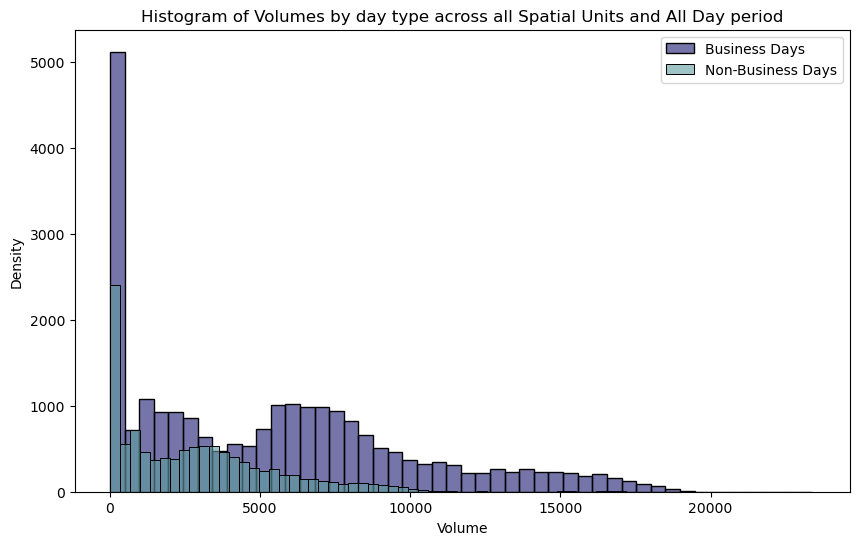

Number of remaining time-slots after filtering 3263
Number of remaining time-slots after filtering 1482


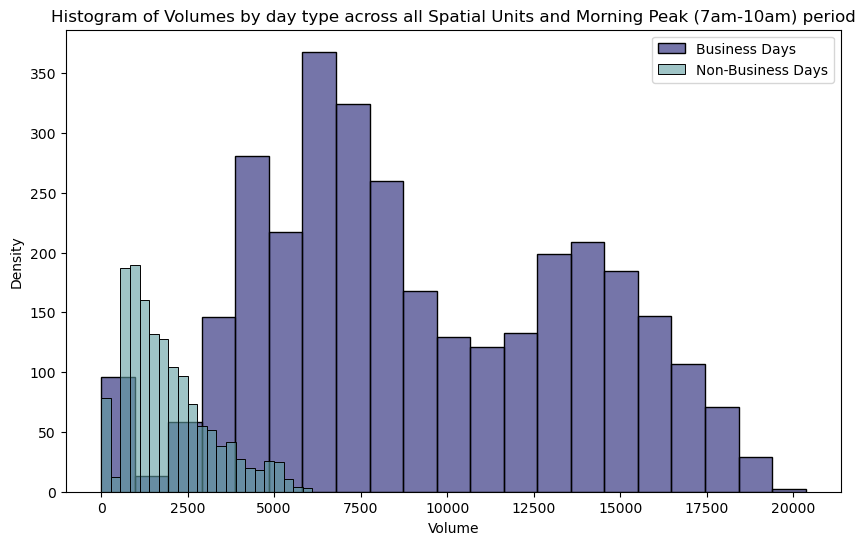

Number of remaining time-slots after filtering 2761
Number of remaining time-slots after filtering 1254


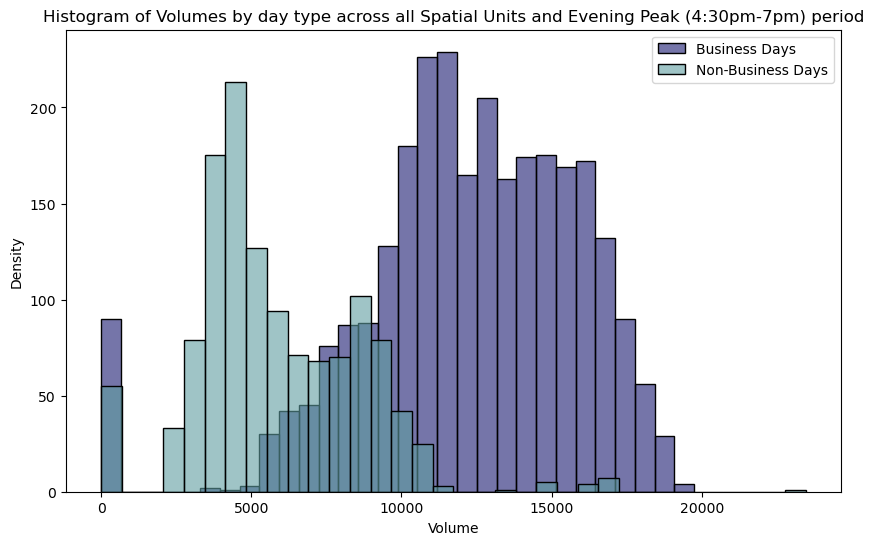

In [29]:
import datetime 

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import folium 
import geopandas as gpd 
current_file_path = os.path.abspath(os.getcwd())
parent_dir = os.path.abspath(os.path.join(current_file_path, '..','..','..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from pipeline.clustering.clustering import filter_by_temporal_agg




IN_bdc = 'midnightblue'  # Inflow - Business Day Color
OUT_bdc = 'indianred' # Outflow - Business Day Color
IN_nbdc = 'cadetblue' # Inflow - Non Business Day Color
OUT_nbdc = 'peru' # Outflow - Non Business Day Color


# --------------------------------------------------
#  Distribution des volumes et valeurs manquantes 


def get_time_bounds(period):
    if period == 'all_day':
        start = datetime.time(0, 00)
        end=datetime.time(23, 59)
    if period == 'morning_peak':
        start = datetime.time(7, 00)
        end=datetime.time(10, 00)
    if period == 'evening_peak':
        start = datetime.time(16, 30)
        end=datetime.time(19, 00)
    return start, end

def convert_to_str(period):
    if period == 'all_day':
        return 'All Day'
    if period == 'morning_peak':
        return 'Morning Peak (7am-10am)'
    if period == 'evening_peak':
        return 'Evening Peak (4:30pm-7pm)'



def filter_per_day_type(df,period,city):
    start, end = get_time_bounds(period)
    ts_bd = filter_by_temporal_agg(df = df,
                                    temporal_agg = 'business_day',
                                    city = city,
                                    start = start,
                                    end=end)

    ts_nbd = filter_by_temporal_agg(df = df,
                                    temporal_agg = 'non_business_day',
                                    city = city,
                                    start = start,
                                    end=end)
    
    return ts_bd, ts_nbd


def get_histogram_per_day_type(df,city,period,stats):
    """ Retourne l'histogramme des volumes 
    en business day et en non business day.
    Les deux histogrammes sont superposée en transparence.

    Args:
        ts (pd.Series): time-serie de volumes d'un seul signal. 
        Exemple: 
            ts est la somme des volumes sur toutes les unités spatiales 
          
    Convert: 
        ts_bd (pd.Series): vecteur de volumes en business day.
        ts_nbd (pd.Series): vecteur de volumes en non business day.

    Returns:    

    """
    if type(df) == pd.core.frame.DataFrame:
        df = df.sum(axis=1)


    # filter by day type
    ts_bd, ts_nbd = filter_per_day_type(df,period,city)

    
    # histogram plot avec sns : 
    plt.figure(figsize=(10,6))
    sns.histplot(ts_bd, color=IN_bdc, label='Business Days', kde=False, stat=stats, alpha=0.6)
    sns.histplot(ts_nbd, color=IN_nbdc, label='Non-Business Days', kde=False, stat=stats, alpha=0.6)
    plt.xlabel('Volume')
    plt.ylabel('Density')
    plt.title('Histogram of Volumes by day type across all Spatial Units and {} period'.format(convert_to_str(period)))
    plt.legend()
    plt.show()
    return ts_bd, ts_nbd



# from utils import get_histogram_per_day_type
stats = 'count'
ts_bd, ts_nbd = get_histogram_per_day_type(df_raw,city= 'Lyon',period = 'all_day',stats = stats)
ts_bd, ts_nbd = get_histogram_per_day_type(df_raw,city= 'Lyon',period = 'morning_peak',stats = stats)
ts_bd, ts_nbd = get_histogram_per_day_type(df_raw,city= 'Lyon',period = 'evening_peak',stats = stats)


In [41]:
df_copy

Spatial Unit ID,AMP,BEL,BRO,CHA,COR,CPA,CRO,CUI,CUS,DEB,...,PAR,PER,GUI,JAU,REP,SAN,SAX,GER,VMY,JEA
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,1.0,64.0,19.0,34.0,47.0,3.0,11.0,2.0,8.0,5.0,...,30.0,73.0,8.0,18.0,13.0,15.0,47.0,9.0,12.0,29.0
2019-01-02 00:15:00,9.0,106.0,9.0,26.0,34.0,1.0,18.0,2.0,6.0,0.0,...,25.0,49.0,7.0,6.0,19.0,4.0,41.0,11.0,5.0,31.0
2019-01-02 00:30:00,4.0,75.0,3.0,23.0,17.0,1.0,3.0,0.0,3.0,4.0,...,23.0,16.0,13.0,2.0,1.0,7.0,48.0,1.0,7.0,16.0
2019-01-02 00:45:00,1.0,5.0,6.0,4.0,3.0,1.0,5.0,3.0,1.0,2.0,...,4.0,3.0,4.0,3.0,1.0,4.0,6.0,3.0,0.0,2.0
2019-01-02 01:00:00,0.0,0.0,3.0,14.0,0.0,0.0,0.0,0.0,3.0,6.0,...,0.0,0.0,2.0,4.0,0.0,0.0,2.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 22:45:00,41.0,309.0,19.0,197.0,72.0,6.0,48.0,21.0,18.0,46.0,...,109.0,182.0,43.0,53.0,23.0,37.0,125.0,25.0,67.0,66.0
2019-12-31 23:00:00,43.0,285.0,30.0,142.0,104.0,1.0,41.0,31.0,26.0,57.0,...,78.0,144.0,27.0,49.0,26.0,76.0,79.0,31.0,38.0,97.0
2019-12-31 23:15:00,31.0,280.0,32.0,149.0,81.0,7.0,79.0,25.0,53.0,26.0,...,127.0,133.0,469.0,60.0,60.0,73.0,100.0,16.0,45.0,69.0


,date,Spatial Unit ID,Volume,day_type
0,2019-01-02,AMP,1.0,Business Day
1,2019-01-02,BEL,64.0,Business Day
2,2019-01-02,BRO,19.0,Business Day
3,2019-01-02,CHA,34.0,Business Day
4,2019-01-02,COR,47.0,Business Day


<Axes: xlabel='Spatial Unit ID', ylabel='Volume'>

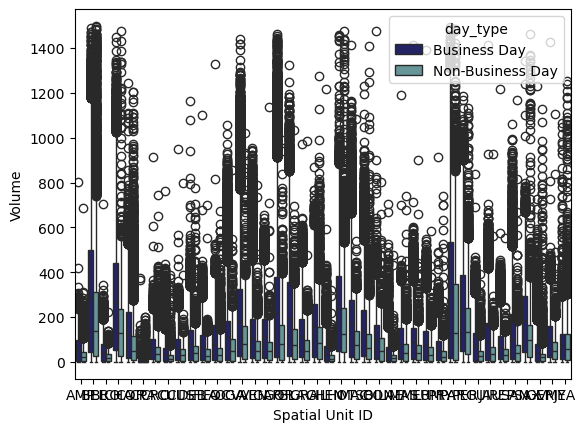

In [50]:
# df_bd, df_nbd = filter_per_day_type(df_raw,period = 'all_day',city= 'Lyon')
# df_bd.columns.name = 'Spatial Unit ID'




display(df_combined.head())





In [35]:
df_bd, df_nbd = filter_per_day_type(df_raw,period = 'all_day',city= 'Lyon')

df_bd['daytype'] = 'Business Day'
df_nbd['daytype'] = 'Non-Business Day'
df_merged = pd.concat([df_bd, df_nbd])
df_merged

Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944


/tmp/ipykernel_265789/1672062983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bd['daytype'] = 'Business Day'
/tmp/ipykernel_265789/1672062983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nbd['daytype'] = 'Non-Business Day'


Station,AMP,BEL,BRO,CHA,COR,CPA,CRO,CUI,CUS,DEB,...,PER,GUI,JAU,REP,SAN,SAX,GER,VMY,JEA,daytype
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,1.0,64.0,19.0,34.0,47.0,3.0,11.0,2.0,8.0,5.0,...,73.0,8.0,18.0,13.0,15.0,47.0,9.0,12.0,29.0,Business Day
2019-01-02 00:15:00,9.0,106.0,9.0,26.0,34.0,1.0,18.0,2.0,6.0,0.0,...,49.0,7.0,6.0,19.0,4.0,41.0,11.0,5.0,31.0,Business Day
2019-01-02 00:30:00,4.0,75.0,3.0,23.0,17.0,1.0,3.0,0.0,3.0,4.0,...,16.0,13.0,2.0,1.0,7.0,48.0,1.0,7.0,16.0,Business Day
2019-01-02 00:45:00,1.0,5.0,6.0,4.0,3.0,1.0,5.0,3.0,1.0,2.0,...,3.0,4.0,3.0,1.0,4.0,6.0,3.0,0.0,2.0,Business Day
2019-01-02 01:00:00,0.0,0.0,3.0,14.0,0.0,0.0,0.0,0.0,3.0,6.0,...,0.0,2.0,4.0,0.0,0.0,2.0,0.0,3.0,0.0,Business Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-29 22:45:00,4.0,127.0,12.0,62.0,58.0,3.0,30.0,4.0,11.0,22.0,...,395.0,8.0,10.0,10.0,12.0,40.0,7.0,19.0,41.0,Non-Business Day
2019-12-29 23:00:00,9.0,114.0,7.0,59.0,49.0,1.0,20.0,5.0,6.0,27.0,...,284.0,12.0,20.0,8.0,18.0,56.0,12.0,19.0,40.0,Non-Business Day
2019-12-29 23:15:00,14.0,140.0,9.0,59.0,63.0,1.0,23.0,4.0,10.0,8.0,...,203.0,6.0,10.0,6.0,8.0,69.0,17.0,19.0,36.0,Non-Business Day


Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944


/tmp/ipykernel_265789/813701586.py:59: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.stripplot(
/tmp/ipykernel_265789/813701586.py:76: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


<Figure size 1200x600 with 0 Axes>

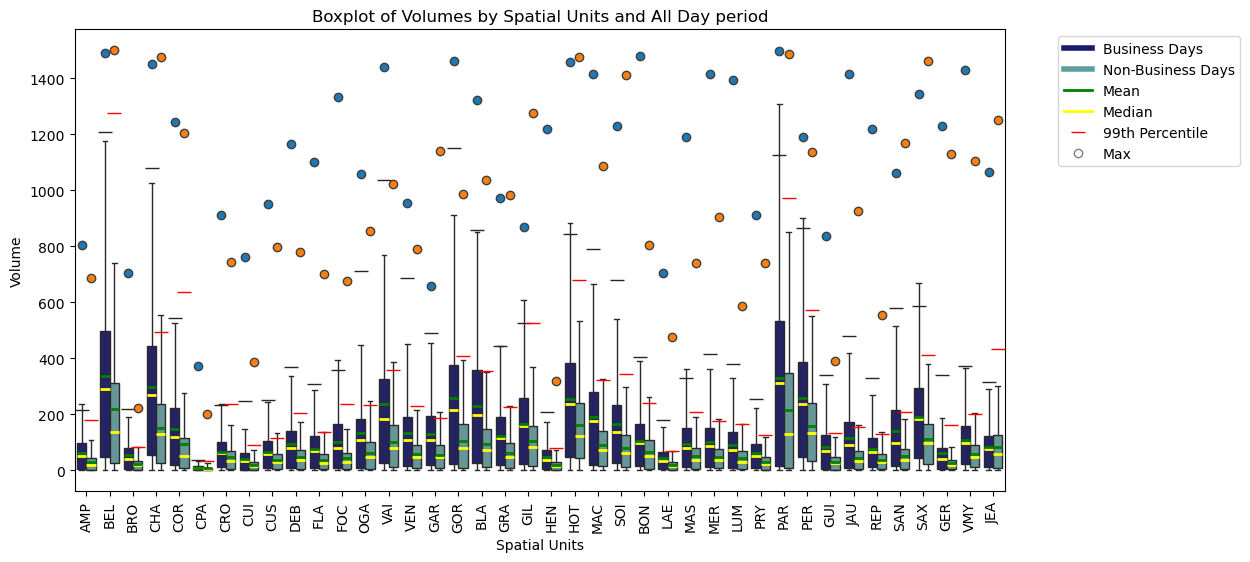

Number of remaining time-slots after filtering 3263
Number of remaining time-slots after filtering 1482


/tmp/ipykernel_265789/813701586.py:59: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.stripplot(
/tmp/ipykernel_265789/813701586.py:76: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


<Figure size 1200x600 with 0 Axes>

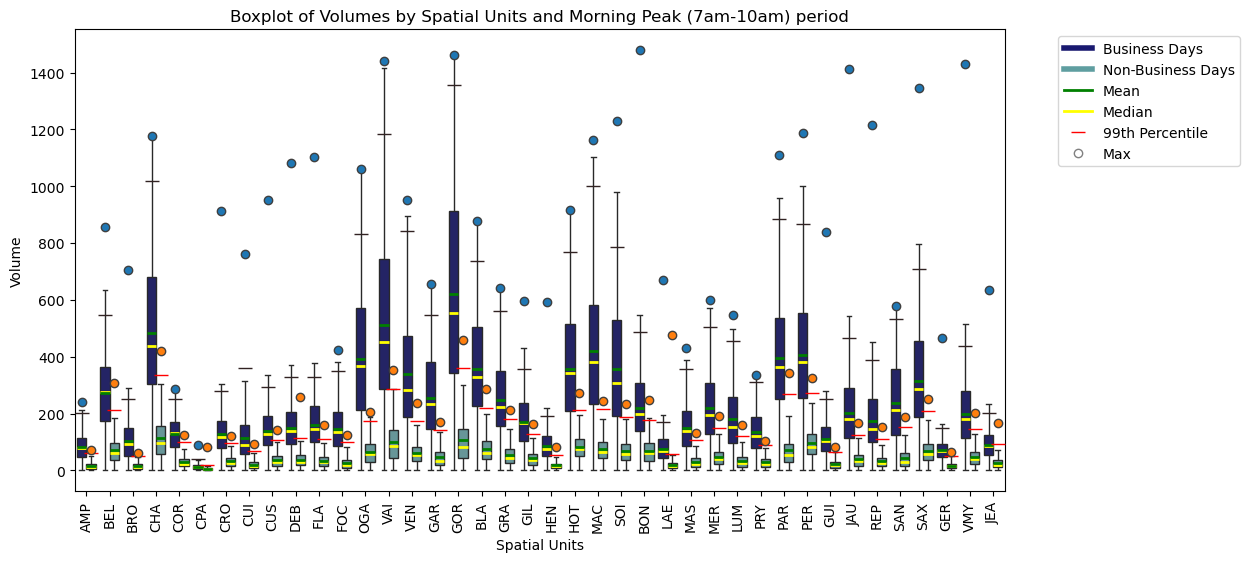

Number of remaining time-slots after filtering 2761
Number of remaining time-slots after filtering 1254


/tmp/ipykernel_265789/813701586.py:59: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.stripplot(
/tmp/ipykernel_265789/813701586.py:76: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(


<Figure size 1200x600 with 0 Axes>

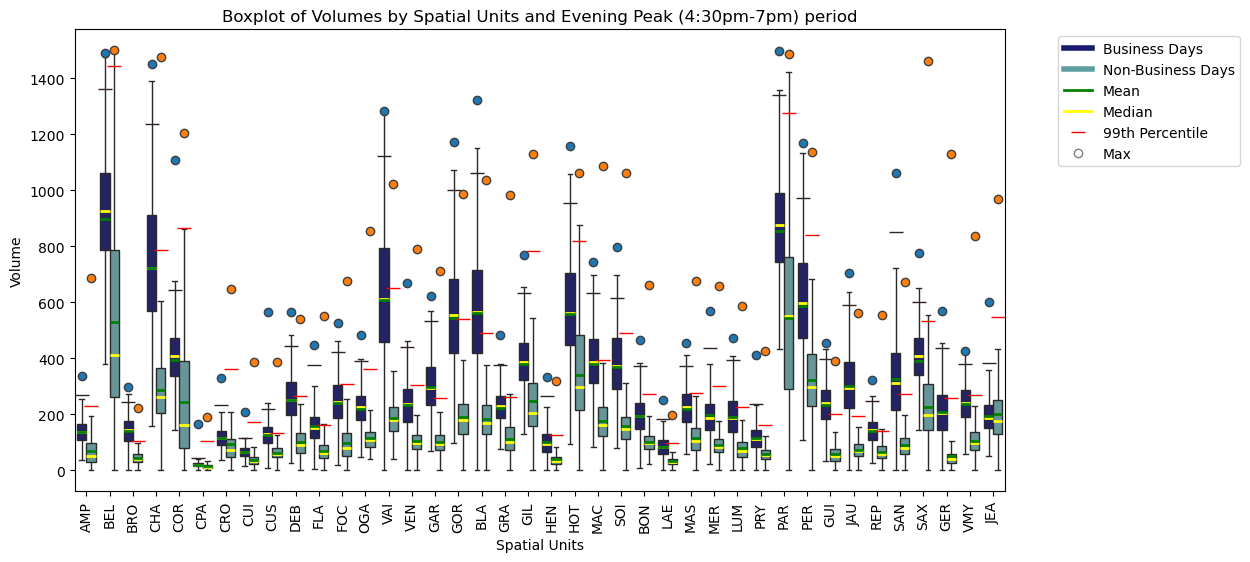

In [75]:

def get_boxplot_per_spatial_unit_per_day_type(df,period,city):
    """
    Retourne les boxplot des volumes par stations en business days et en non business days. Les deux boxplots sont superposés en transparence.
    
    Exemple:
        df (pd.DataFrame): dataframe des volumes avec des timestamp en index et une colonne par unité spatiale.
    """
    # filter by day type
    df_bd, df_nbd = filter_per_day_type(df,period,city)

    # boxplot plot avec sns :
    plt.figure(figsize=(12,6))

    df_bd = df_bd.stack()
    df_bd.name = 'Volume'
    df_bd = df_bd.reset_index()
    df_bd['day_type'] = 'Business Day'

    df_nbd = df_nbd.stack()
    df_nbd.name = 'Volume'
    df_nbd = df_nbd.reset_index()
    df_nbd['day_type'] = 'Non-Business Day'
    df_combined = pd.concat([df_bd, df_nbd], axis=0)

    # 1. CALCUL DES INDICATEURS SUPPLEMENTAIRES A AFFICHER
    df_q = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].agg(
                                        # q90=lambda x: x.quantile(0.75),
                                        # q95=lambda x: x.quantile(0.95),
                                        q99=lambda x: x.quantile(0.99),
                                    ).reset_index()
    # Transformation en format long pour l'affichage (une ligne par valeur)
    df_q = df_q.melt(id_vars=['Spatial Unit ID', 'day_type'], value_name='Volume').drop(columns='variable')

    # B. Calcul des Max pour les afficher comme cercles vides
    df_max = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].max().reset_index()


    # 2. AFFICHAGE DU GRAPHIQUE
    fig, ax = plt.subplots(figsize=(12, 6))

    # COUCHE 1 : Le Boxplot principal (Moustaches à 5% et 95%)
    sns.boxplot(
        data=df_combined,
        x='Spatial Unit ID',
        y='Volume',
        hue="day_type",
        palette={'Business Day': IN_bdc, 'Non-Business Day': IN_nbdc},
        showfliers=False,       # On cache les outliers classiques
        showcaps=True,
        showmeans=True,
        meanline=True,
        meanprops={"color": "green", "linestyle": "-", "linewidth": 2},
        medianprops={"color": "yellow", "linewidth": 2},
        ax=ax
    )

    # COUCHE 2 : Les traits horizontaux pour 10% et 90%
    # On utilise le marqueur "_" (underscore) qui fait une ligne horizontale
    sns.stripplot(
        data=df_q,
        x='Spatial Unit ID',
        y='Volume',
        hue="day_type",
        dodge=True,             # Indispensable pour s'aligner sur les boîtes décalées
        jitter=False,
        marker='_',             # Le secret pour avoir une barre horizontale
        size=10,                # Taille de la barre (largeur)
        linewidth=1,            # Epaisseur du trait
        color='red',          # Couleur des traits 10/90
        legend=False,
        ax=ax,
        zorder=10               # S'assure que c'est dessiné au-dessus
    )

    # COUCHE 3 : Les MAX (Cercles vides gris)
    sns.stripplot(
        data=df_max,
        x='Spatial Unit ID',
        y='Volume',
        hue="day_type",
        dodge=True,
        jitter=False,
        marker='o',
        size=6,
        linewidth=1,          # Epaisseur du contour gris
        edgecolor='gray',           # Couleur définie pour contour ET face
        facecolors='white',      # Rendre l'intérieur transparent (écrase la couleur de face)
        legend=False,
        ax=ax,
        zorder=11
    )


    plt.xticks(rotation=90)
    plt.xlabel('Spatial Units')
    plt.ylabel('Volume')
    plt.title('Boxplot of Volumes by Spatial Units and {} period'.format(convert_to_str(period)))

    # Affiche la légende des : 
    #  - business day 
    #  - non business day
    #  - mean (ligne verte)
    #  - median (ligne jaune)
    #  - quantile 99% (traits rouges)
    #  - max (cercles gris vides)
    #  - boxplots quantile 5%-95%
    handles = [plt.Line2D([0], [0], color=IN_bdc, lw=4, label='Business Days'),
                plt.Line2D([0], [0], color=IN_nbdc, lw=4, label='Non-Business Days'),
                plt.Line2D([0], [0], color='green', lw=2, label='Mean'),
                plt.Line2D([0], [0], color='yellow', lw=2, label='Median'),
                plt.Line2D([0], [0], color='red', marker='_', markersize=10, linestyle='None', label='99th Percentile'),  
                plt.Line2D([0], [0], color='gray', marker='o', markersize=6, markerfacecolor='none', linestyle='None', label='Max')]
    ax.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
    # Affiche la legende hors du cadre du plot, à droite: 







    plt.show()
    return df_bd, df_nbd

# from utils import get_boxplot_per_spatial_unit_per_day_type
df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'all_day',city= 'Lyon')
df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'morning_peak',city= 'Lyon')
df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'evening_peak',city= 'Lyon')





# # --------------------------------------------------
# # Identification des particularités:

# def heatmap_normalized(df):
#     """ Retourne une heatmap des volumes normalisés par unité spatiale et par day type """

#     df_bd, df_nbd =

#     # get stats 
#     for df in [df_bd, df_nbd]:
#         df_mean = df.mean()
#         df_std = df.std()
#         df_normalized = (df - df_mean) / df_std

#         # plot heatmap 


# Load Datasets : 

In [2]:
import sys
import os
import pandas as pd
import datetime 
current_file_path = os.path.abspath(os.getcwd())
parent_dir = os.path.abspath(os.path.join(current_file_path, '..','..','..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from load_inputs.systematic_analysis.load_subway import load_dataset


signal = 'subway_in' # 'subway_out' # 'subway_in'

ds, df_raw, df =  load_dataset(signal)
df_raw.head()

   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_in/subway_in.csv


Station,AMP,BEL,BRO,CHA,COR,CPA,CRO,CUI,CUS,DEB,...,PAR,PER,GUI,JAU,REP,SAN,SAX,GER,VMY,JEA
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2.0,53.0,6.0,21.0,21.0,4.0,1.0,2.0,3.0,3.0,...,74.0,38.0,2.0,8.0,6.0,6.0,23.0,7.0,7.0,12.0
2019-01-01 00:15:00,3.0,29.0,2.0,14.0,8.0,0.0,3.0,2.0,1.0,5.0,...,105.0,25.0,3.0,6.0,5.0,3.0,38.0,9.0,8.0,13.0
2019-01-01 00:30:00,3.0,19.0,3.0,19.0,20.0,1.0,2.0,0.0,1.0,6.0,...,18.0,15.0,3.0,6.0,1.0,6.0,19.0,0.0,3.0,8.0
2019-01-01 00:45:00,1.0,5.0,2.0,4.0,3.0,1.0,4.0,3.0,0.0,4.0,...,4.0,2.0,0.0,2.0,2.0,4.0,6.0,2.0,0.0,0.0
2019-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [7]:



df_bd = filter_by_temporal_agg(df = df_raw,
                                     temporal_agg = 'business_day',
                                     city = 'Lyon',
                                     start = datetime.time(0, 00),
                                     end=datetime.time(23, 59))

df_nbd = filter_by_temporal_agg(df = df_raw,
                                     temporal_agg = 'non_business_day',
                                     city = 'Lyon',
                                     start = datetime.time(0, 00),
                                     end=datetime.time(23, 59))





Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944
Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944


In [8]:
summed_flow = df_raw.sum(axis=1)
print(type(df_raw))
type(summed_flow) == pd.core.frame.DataFrame


<class 'pandas.core.frame.DataFrame'>


False